In [1]:
from scipy.optimize import fsolve
import numpy as np
from scipy.integrate import  odeint

import matplotlib.pyplot as plt

In [2]:
def k_calc(dydt,Ysoli,h,ti):
    k1=fsolve( lambda _k1: _k1-dydt(Ysoli+h*_k1,ti+h) ,Ysoli )
    k2=fsolve( lambda _k2: _k2-dydt(Ysoli+h*(_k2-k1),ti) ,Ysoli )
    return k1,k2

def sdirk212(dydt,y0,t0,t1,err0=1.e-3,relerr0=1.e-3,h=1.e-3,hmin=1.e-4,hmax=1.e-1,Nmax=5000,beta=.5):
    
    Ysol=np.array([y0])
    tsteps=np.array([t0])
    tnext=t0
    
    i=0
    hnew=h
    while i<Nmax and tnext<t1:
        while True:
            k1,k2 = k_calc(dydt,Ysol[i],hnew,tsteps[i])
            err=hnew/2*np.abs(k1-k2)
            ynext2=Ysol[i]+hnew/2*(k1+k2)
            if err/ynext2<relerr0 and err<err0 or hnew<hmin or hnew>hmax :
                break
            else:
                hnew*=beta*(err0/err)
                
        if hnew>hmin and hnew<hmax:
            hnew*=beta*(err0/err)**(0.5)
            
        if hnew>hmax:    
            hnew=hmax
            
        if hnew<hmin:
            hnew=hmin
            
        tnext=tsteps[i]+hnew
        k1,k2 = k_calc(dydt,Ysol[i],hnew,tsteps[i])
        ynext1=Ysol[i]+hnew*k1
        ynext2=Ysol[i]+hnew/2*(k1+k2)
    
        Ysol=np.append(Ysol,ynext2)
        tsteps=np.append(tsteps,tnext)
        
        i+=1
    return tsteps, Ysol,
    
    

In [3]:
def dydt(y,t):
    return (-np.sin(y-6*t**2)+np.sin(y**2-t*10))*np.exp(-0.05*(t-1)**2)

In [4]:
%time t,y=sdirk212(dydt,1,0,5,relerr0=1.e-3,err0=1.e-3,h=1.e-3,hmin=1.e-4,hmax=5.e-1,Nmax=5000,beta=.05)
print 1
%time yf=odeint(dydt,1,t,mxstep=5000,atol=1.e-7,rtol=1.e-7)

rel_er= np.array([np.abs((y[i]-yf[i])/yf[i]) for i in np.arange(len(t))  ])

CPU times: user 4.23 s, sys: 0 ns, total: 4.23 s
Wall time: 4.22 s
1
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 9.9 ms


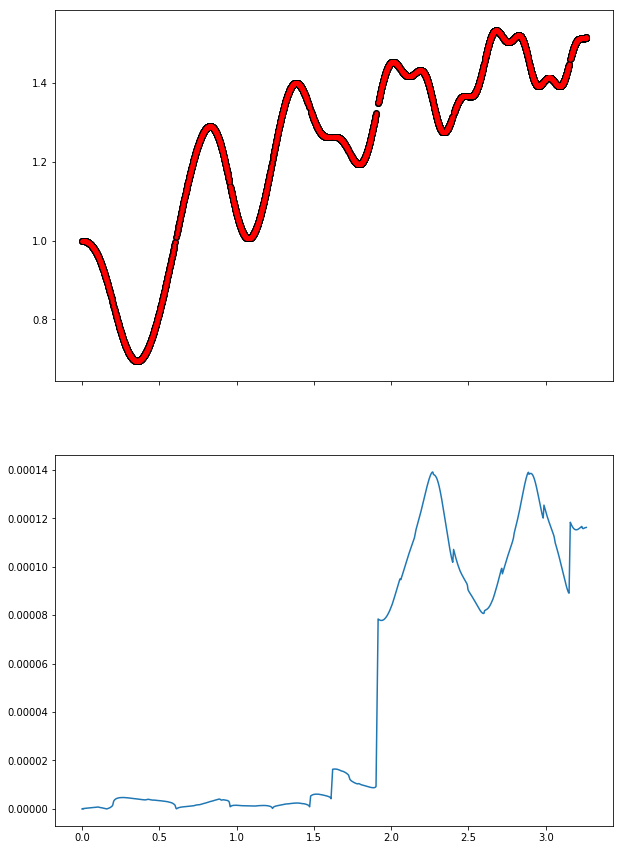

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(10, 15))

ax[0].scatter(t,y,color='black',marker='o')
ax[0].scatter(t,yf,color='r',marker='.')
ax[1].plot(t,rel_er)

plt.show();
